In [1]:
# import libraries

#% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn import linear_model
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import datetime

from typing import Dict, List

import warnings
warnings.filterwarnings("ignore")

In [2]:
auto_df = pd.read_csv('https://raw.githubusercontent.com/PriyaVj-UW/DS-Playground/master/auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto_df.shape

(398, 9)

In [4]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
auto_df = auto_df.replace('?',np.nan)

In [7]:
auto_df['horsepower'].isna().unique()

array([False,  True])

In [8]:
auto_df = auto_df.dropna()

In [9]:
auto_df.shape

(392, 9)

In [10]:
auto_df.drop(['origin','car name'],axis = 1,inplace = True)

In [11]:
auto_df['model year'] = '19' + auto_df['model year'].astype(str)

In [12]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


In [13]:
# Get the age of the car
auto_df['age'] = datetime.datetime.now().year - pd.to_numeric(auto_df['model year'])

In [14]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,1970,54
1,15.0,8,350.0,165,3693,11.5,1970,54
2,18.0,8,318.0,150,3436,11.0,1970,54
3,16.0,8,304.0,150,3433,12.0,1970,54
4,17.0,8,302.0,140,3449,10.5,1970,54


In [15]:
auto_df.drop(['model year'],axis = 1,inplace = True)

In [16]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,54
1,15.0,8,350.0,165,3693,11.5,54
2,18.0,8,318.0,150,3436,11.0,54
3,16.0,8,304.0,150,3433,12.0,54
4,17.0,8,302.0,140,3449,10.5,54


In [17]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [18]:
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'],errors = 'coerce')

In [19]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

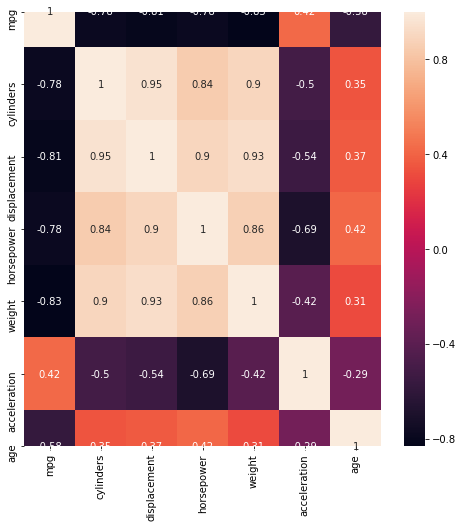

In [20]:
# correlation matrix
fig,ax = plt.subplots(figsize = (8,8))
sns.heatmap(auto_df.corr(),annot = True)

In [21]:
#x = auto_df.drop(['mpg'],axis = 1)
#y=auto_df['mpg']

In [22]:
# Split the dataset
#y = auto_df['mpg']
#x = auto_df.drop(['mpg'], 'columns',inplace = True)

In [23]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [24]:
# Build a Linear regression Model
#linear_model = LinearRegression(normalize = True)
#linear_model.fit(x_train,y_train)

In [25]:
#y_pred = linear_model.predict(x_test)

In [26]:
#X = sm.add_constant(x)
#model = sm.OLS(y,X).fit()
#print(model.summary())

### Regularization - Lasso , Ridge and ElasticNet

In [27]:
def build_model(regression_fn,
               name_of_y_col,
               name_of_x_cols,
               dataset,
               test_frac=0.2,
               preprocessing_fn=None,
               show_plot_y=False,
               show_plot_scatter=False):
    
    X = dataset[name_of_x_cols]
    Y = dataset[name_of_y_col]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = test_frac)
    
    model = regression_fn(x_train,y_train)
    y_pred = model.predict(x_test)
    
    print("Training Score: ", model.score(x_train,y_train))
    print("Test score: ", r2_score(y_test,y_pred))
    
    if show_plot_y == True:
        fig,ax = plt.subplots(figsize=(12,8))
        
        plt.plot(y_pred, label = 'Predicted')
        plt.plot(y_test.values, label = 'Actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()
        
    if show_plot_scatter ==  True:
        fig,ax = plt.subplots(figsize = (12,8))
        plt.scatter(x_test,y_test)
        plt.plot(x_test,y_pred,'r')
        
        plt.legend('Predictedline', 'Observeddata')
        plt.show()
    
    return {
             'training_score' : model.score(x_train,y_train),
             'test_score': r2_score(y_test,y_pred)
           }
        

In [28]:
def compare_results():
    for key in result_dict:
        print('Regression: ',key)
        print('Training score',result_dict[key]['training_score'])
        print('Test score: ', result_dict[key]['test_score'])
        print()

In [29]:
def linear_reg(x_train,y_train):
    model = LinearRegression(normalize = True)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.6985194314501573
Test score:  0.6681122628150655


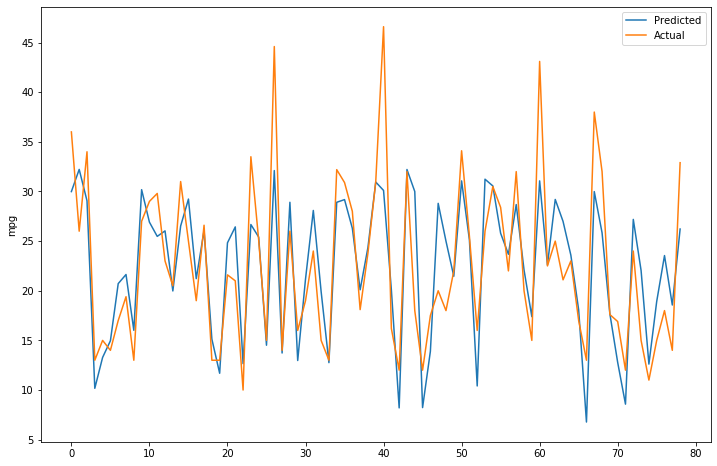

In [35]:
result_dict = {}
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                'mpg',
                                                ['weight'],
                                                auto_df,
                                                show_plot_y = True)

In [43]:
def Lasso_Reg(x_train,y_train,alpha = 0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.7132844808811991
Test score:  0.6667005983386489


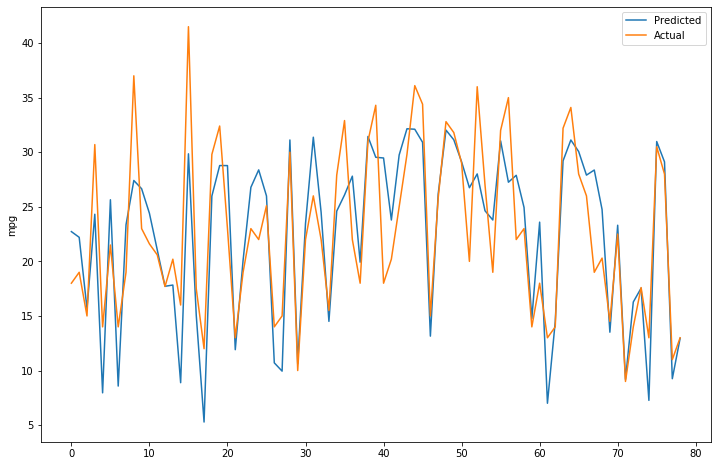

In [44]:
result_dict['mpg-Lasso_reg'] = build_model(Lasso_Reg,
                                          'mpg',
                                          ['cylinders',
                                           'weight',
                                           'horsepower',
                                           'acceleration',
                                          'displacement'],
                                          auto_df,
                                          show_plot_y = True
                                         )

In [45]:
def Ridge_Regression(x_train,y_train,alpha = 0.5, normalize = True) :
    model = Ridge(alpha = alpha, normalize = normalize)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.6962986810380531
Test score:  0.6476047741384485


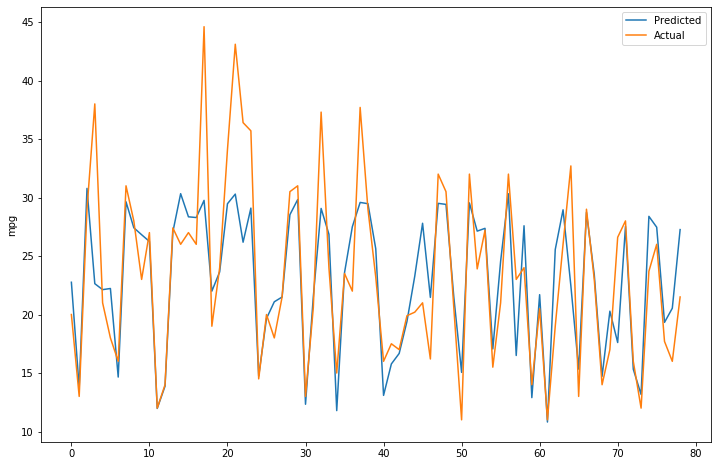

In [46]:
result_dict['Ridge-Regression'] = build_model(Ridge_Regression,
                                              'mpg',
                                          ['cylinders',
                                           'weight',
                                           'horsepower',
                                           'acceleration',
                                          'displacement'],
                                          auto_df,
                                          show_plot_y = True
                                         )
                                             

In [47]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6985194314501573
Test score:  0.6681122628150655

Regression:  mpg-Lasso_reg
Training score 0.7132844808811991
Test score:  0.6667005983386489

Regression:  Ridge-Regression
Training score 0.6962986810380531
Test score:  0.6476047741384485



In [50]:
def ElasticNet_Reg(x_train,y_train,alpha = 1,l1_ratio = 0.5,max_iter =1000, normalize = False,equivalent_to = "Elastic Net") :
    model = ElasticNet(alpha = alpha,l1_ratio = l1_ratio,max_iter = max_iter,normalize = normalize)
    model.fit(x_train,y_train)
    
    return model

Training Score:  0.7014040711903801
Test score:  0.7228691233674909


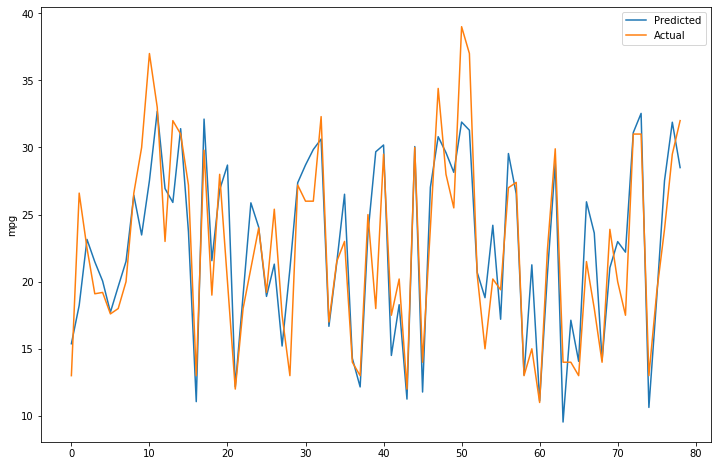

In [51]:
result_dict['mpg-Elastic_reg'] = build_model(ElasticNet_Reg,
                                          'mpg',
                                          ['cylinders',
                                           'weight',
                                           'horsepower',
                                           'acceleration',
                                          'displacement'],
                                          auto_df,
                                          show_plot_y = True
                                         )

In [52]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.6985194314501573
Test score:  0.6681122628150655

Regression:  mpg-Lasso_reg
Training score 0.7132844808811991
Test score:  0.6667005983386489

Regression:  Ridge-Regression
Training score 0.6962986810380531
Test score:  0.6476047741384485

Regression:  mpg-Elastic_reg
Training score 0.7014040711903801
Test score:  0.7228691233674909

